# Problem Statement
- The problem at hand is to perform K-prototype clustering on a given dataset. The dataset consists of various features such as age, workclass, education, marital status, occupation, race, sex, capital gain, capital loss, hours per week, native country, and income. The goal is to group similar categorical feature data points together based on their feature values using the K-prototype algorithm. 

## Objective
- The objective of this project is to apply K-prototype clustering on the provided dataset in order to identify patterns and group similar data points together. By performing clustering, we can gain insights into the underlying structure of the data and potentially discover meaningful clusters or segments within the dataset.


## Proposed Solution

- The proposed solution involves using the K-prototype clustering algorithm on the given dataset. K-prototype is an unsupervised learning algorithm that partitions the data into K clusters, where K is a predefined number chosen by the user. The algorithm works only on a categorical data. The algorithm iteratively assigns data points to the nearest cluster and updates the centroids based on the assigned points. In the process, we will also create a pipeline for multiple things like data, cleaning data, EDA and then on the final pipeline the model will be trained.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kprototypes

In [3]:
from kmodes.kprototypes import KPrototypes

In [4]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df = df.replace("?", np.nan)

This dataset has <b>"?"</b> instead of NA values. So, we first change these <b>"?"</b> to  <b>"NA"</b> and then work with it.

In [7]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

We see there are 3 features with certain missing values, we will deal with them in feature engineering section.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

We just took a look at the distribution of the "income", just to have an idea about the clusters.


Let us start with EDA and understand a the data better.

### EDA

In [10]:
data = df

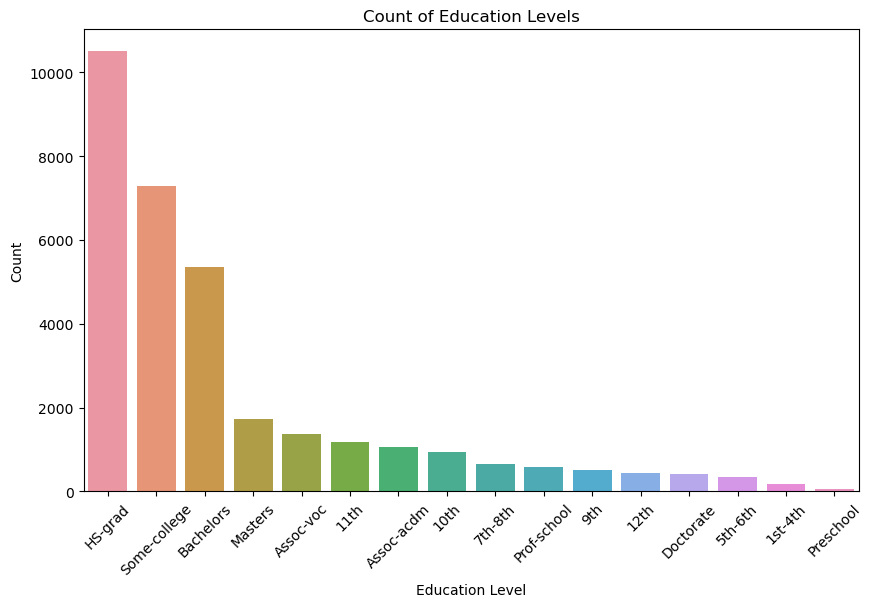

In [11]:
# Count the occurrences of each education level
education_counts = data['education'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Count of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart displays the count of each education level in the dataset. It provides insights into the distribution and prevalence of different education levels among the individuals

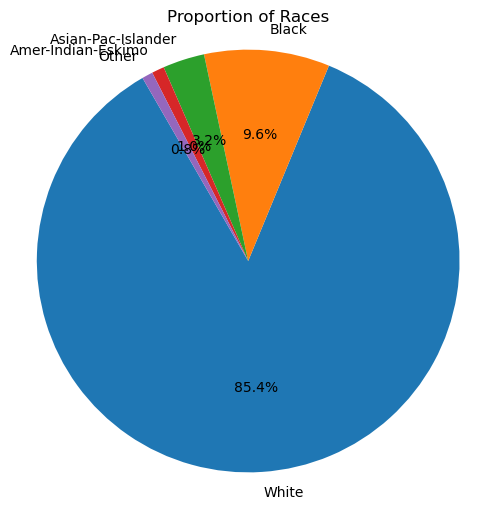

In [12]:
# Count the occurrences of each race
race_counts = df['race'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Proportion of Races')
plt.axis('equal')
plt.show()

The resulting pie chart provides a visual representation of the distribution of races in the dataset. It allows for a quick understanding of the relative proportions of different races and their representation in the data. The chart can be useful for exploring racial diversity, identifying any imbalances or biases in the dataset, and analyzing the impact of race on various factors or outcomes of interest.






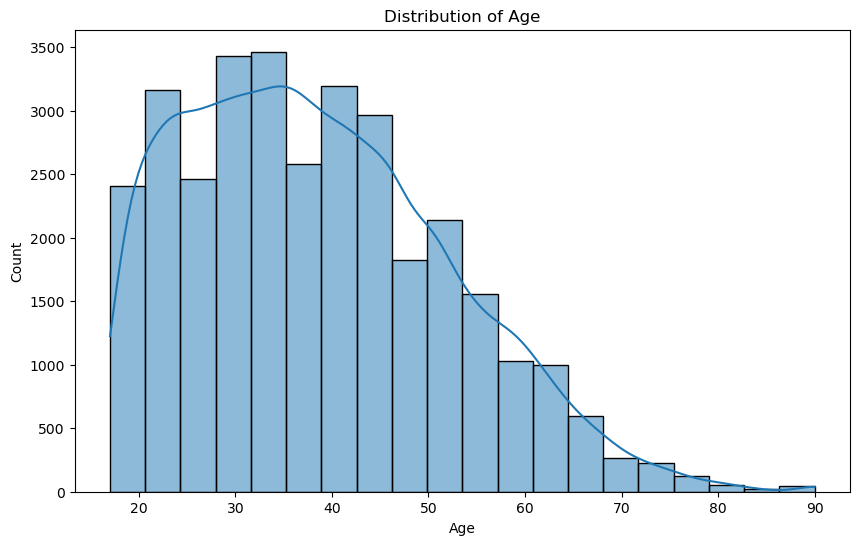

In [13]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

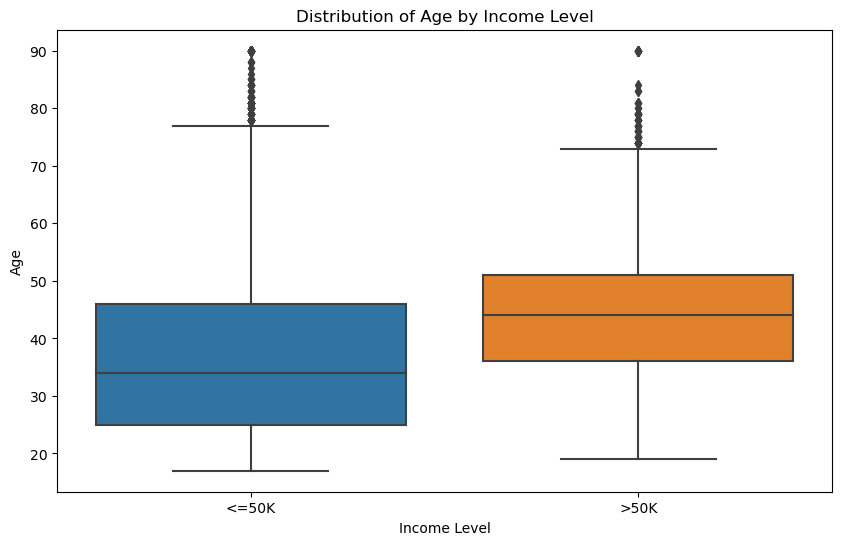

In [14]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Distribution of Age by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.show()

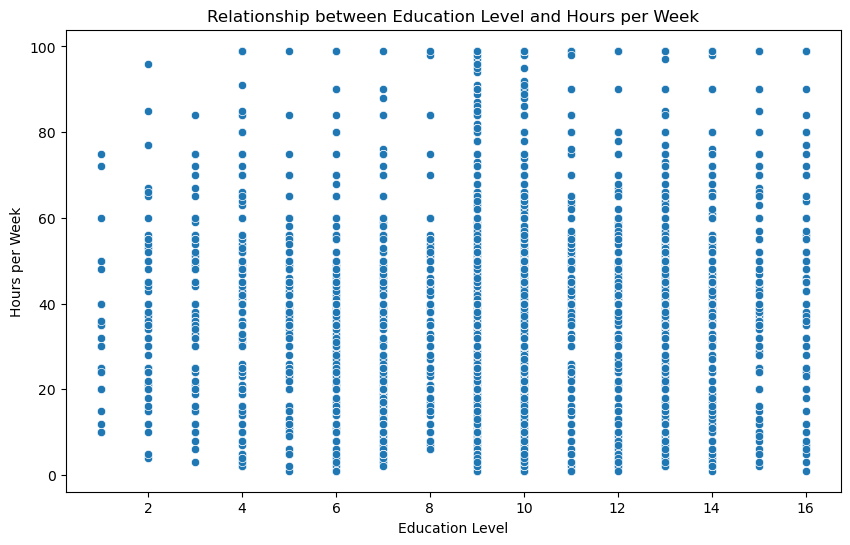

In [15]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education.num', y='hours.per.week', data=data)
plt.title('Relationship between Education Level and Hours per Week')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')
plt.show()

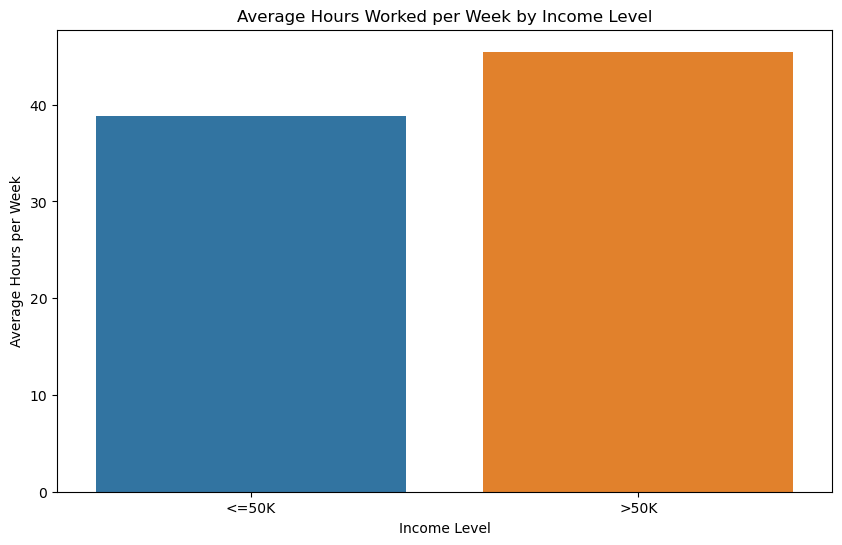

In [16]:
# Calculate the average hours worked per week by income level
avg_hours_by_income = data.groupby('income')['hours.per.week'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_hours_by_income.index, y=avg_hours_by_income.values)
plt.title('Average Hours Worked per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Hours per Week')
plt.show()

We dont see any major imbalance here, meaning the clusters would be formed well.

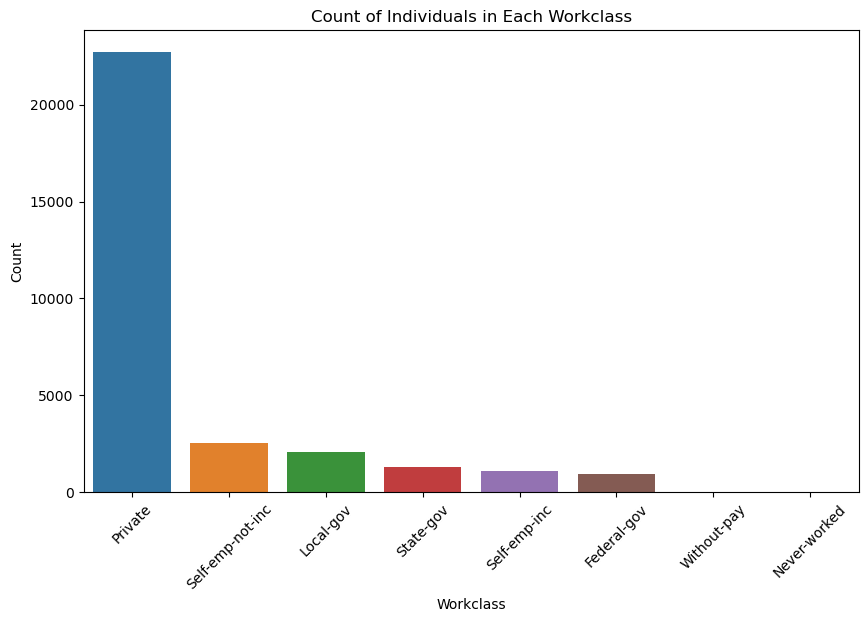

In [17]:
# Count the occurrences of each workclass
workclass_counts = data['workclass'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values)
plt.title('Count of Individuals in Each Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

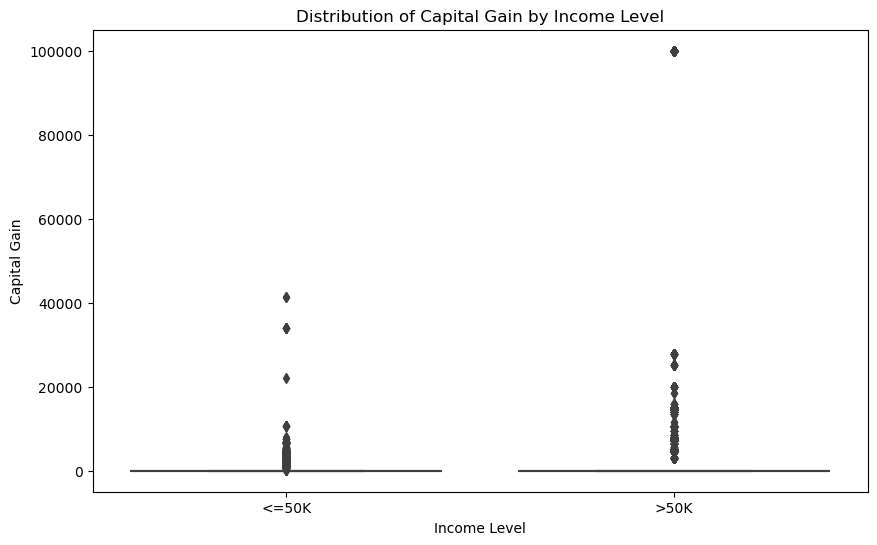

In [18]:
# Group the data by income level and calculate the median capital gain
capital_gain_by_income = data.groupby('income')['capital.gain'].median()

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital.gain', data=data)
plt.title('Distribution of Capital Gain by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Gain')
plt.show()

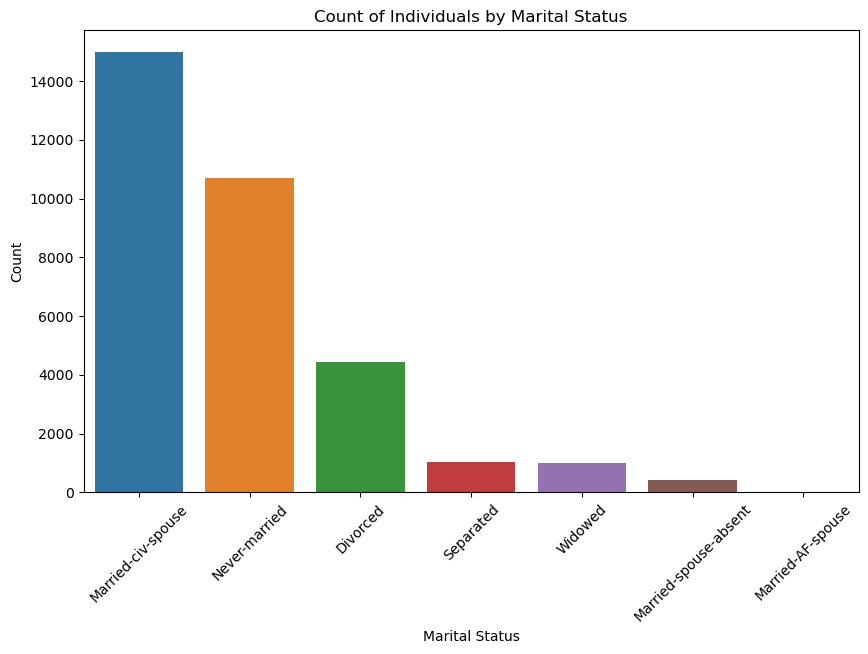

In [19]:
# Count the occurrences of each marital status
marital_status_counts = data['marital.status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.title('Count of Individuals by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


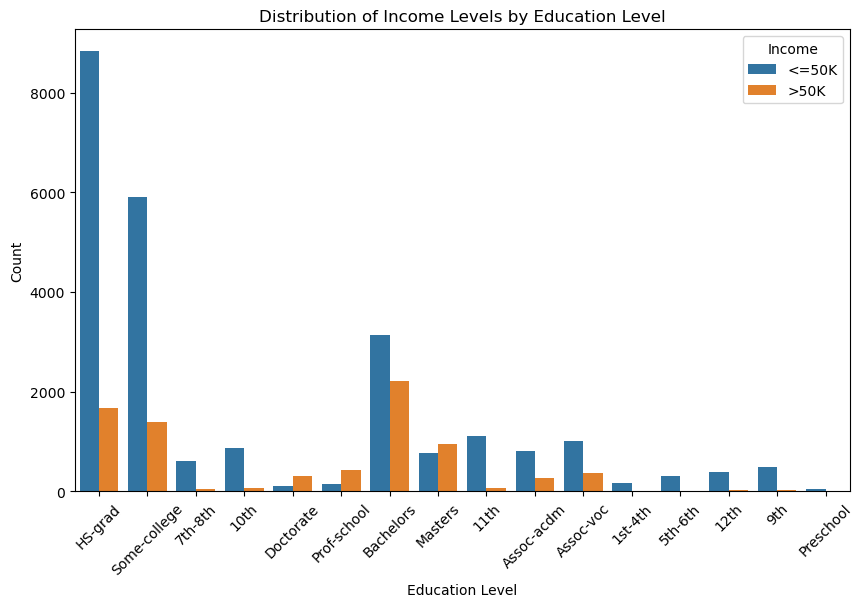

In [20]:
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Distribution of Income Levels by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()


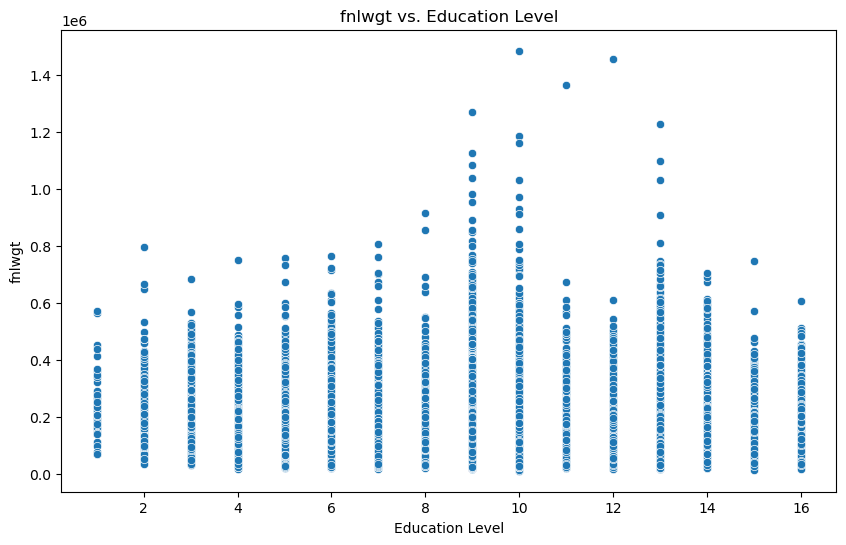

In [21]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education.num', y='fnlwgt', data=data)
plt.title('fnlwgt vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('fnlwgt')
plt.show()

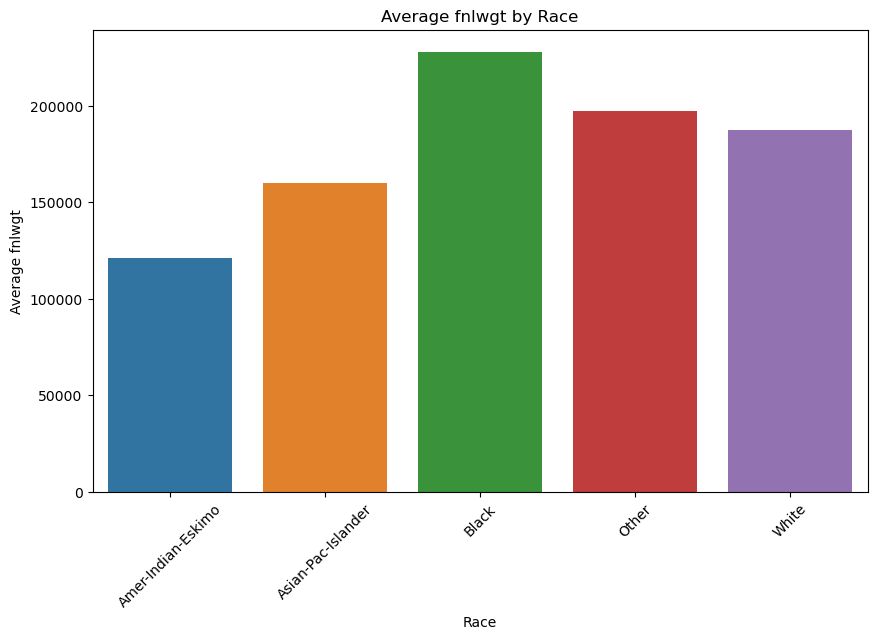

In [22]:
# Calculate the average fnlwgt by race
avg_fnlwgt_by_race = data.groupby('race')['fnlwgt'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fnlwgt_by_race.index, y=avg_fnlwgt_by_race.values)
plt.title('Average fnlwgt by Race')
plt.xlabel('Race')
plt.ylabel('Average fnlwgt')
plt.xticks(rotation=45)
plt.show()


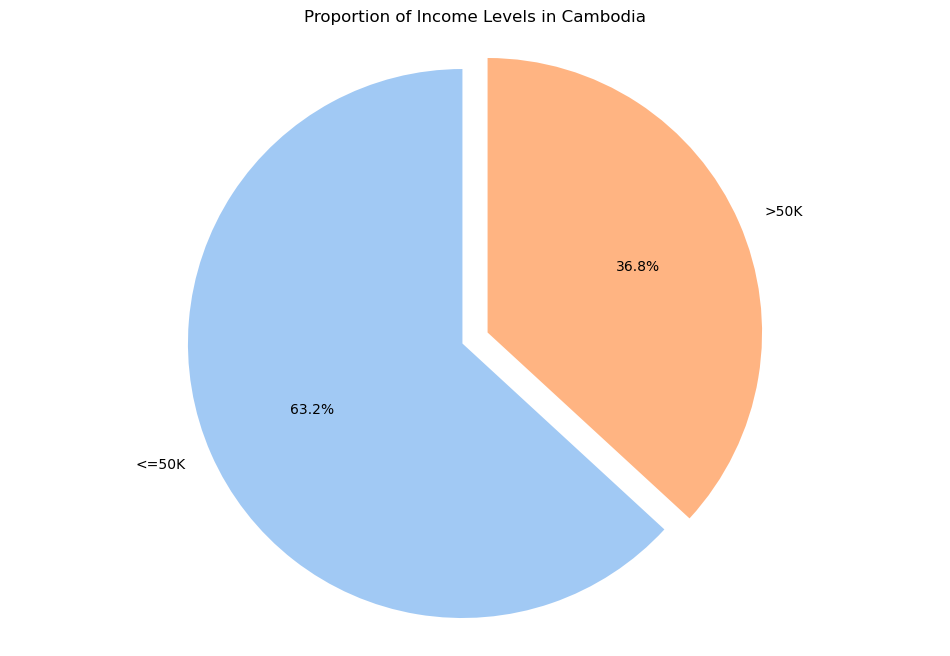

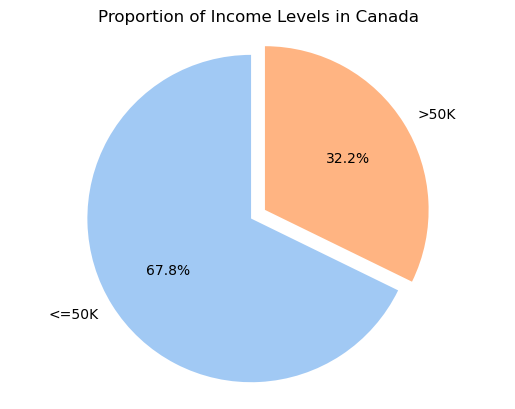

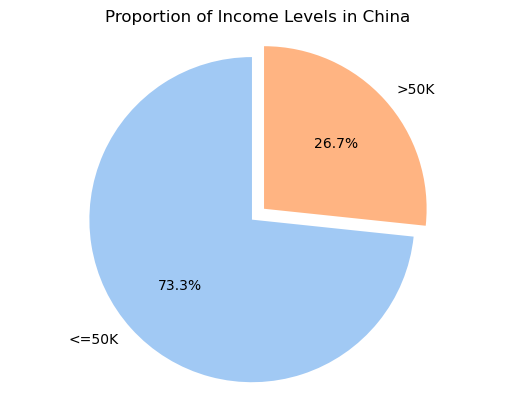

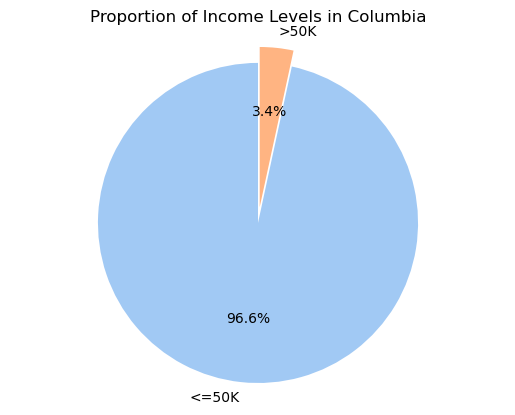

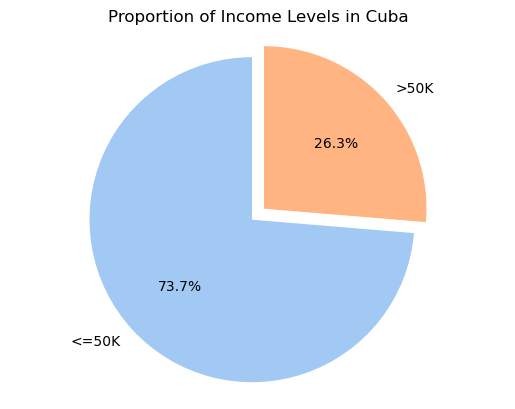

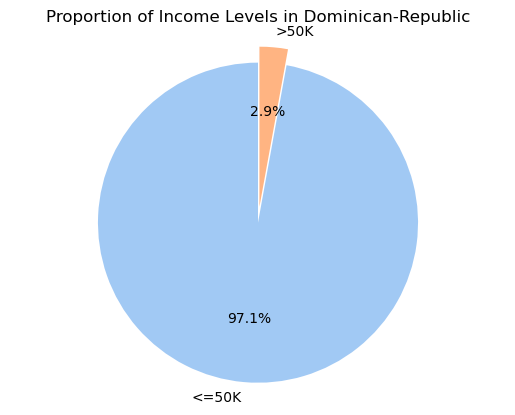

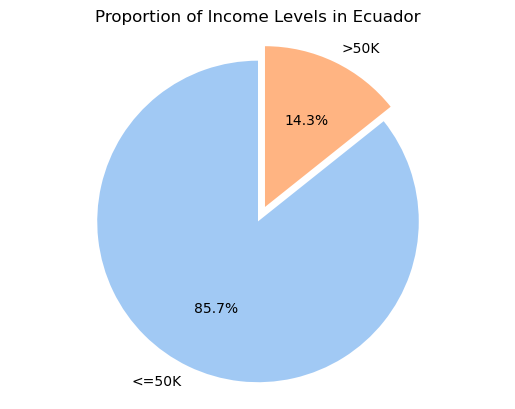

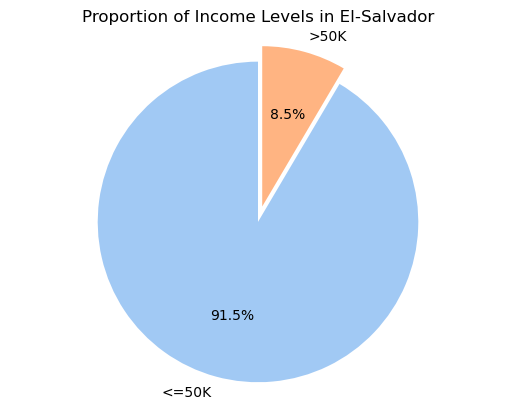

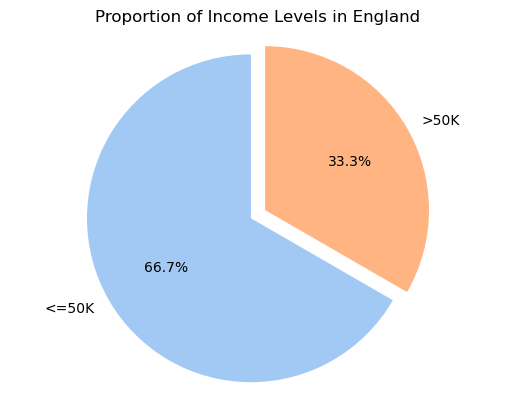

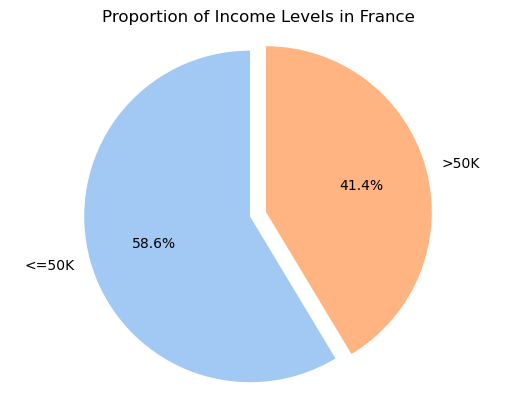

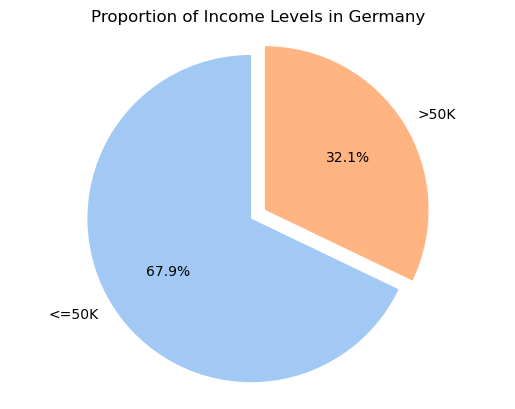

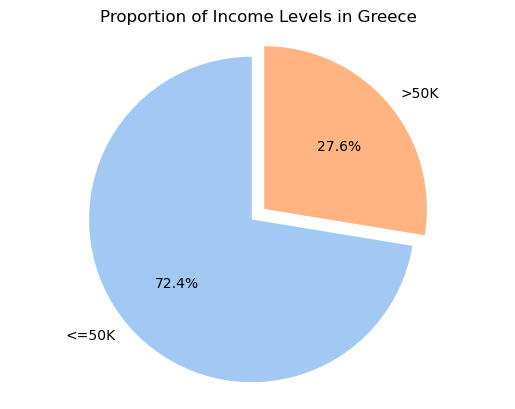

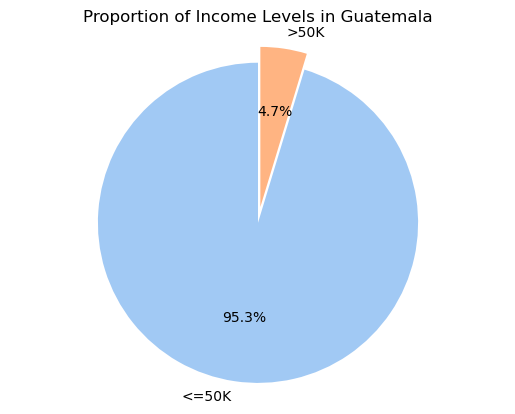

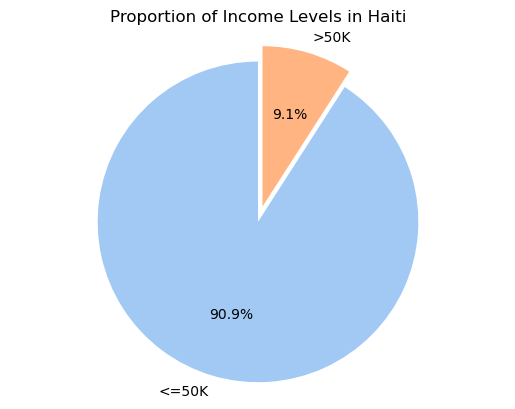

An error occurred while processing


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

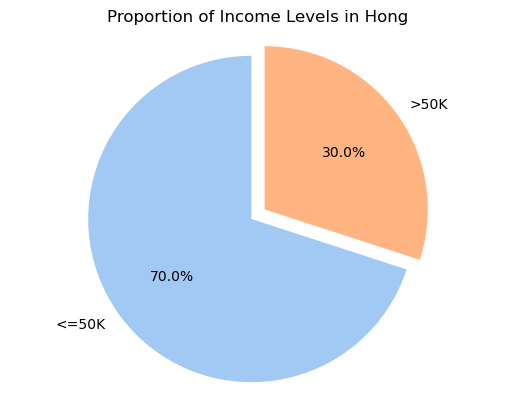

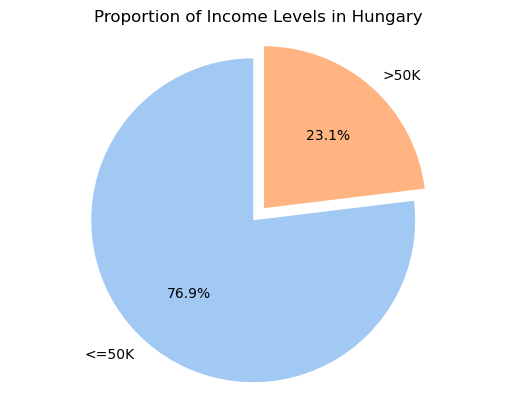

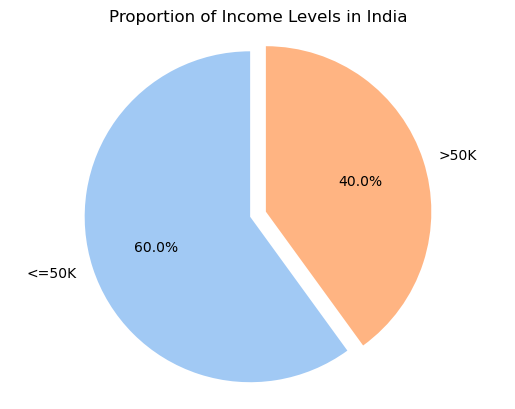

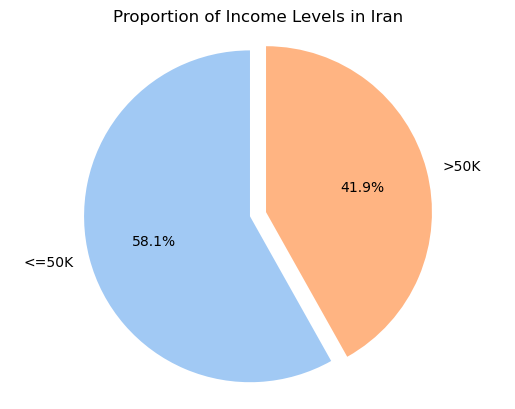

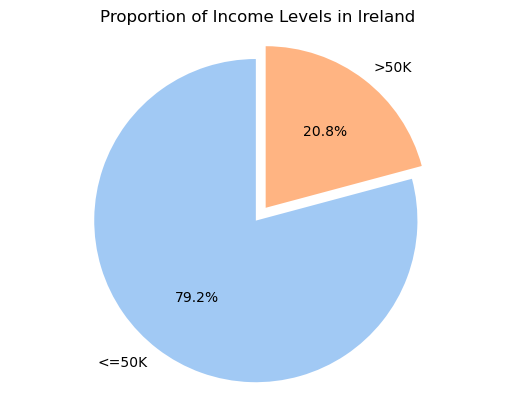

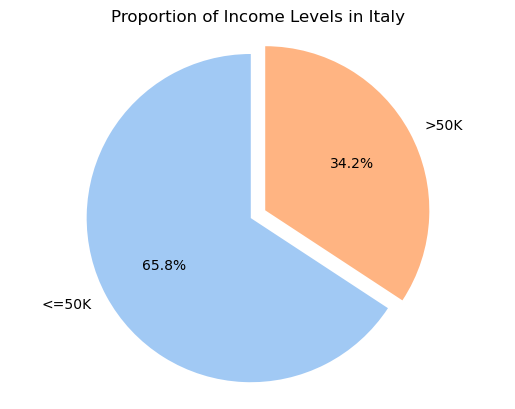

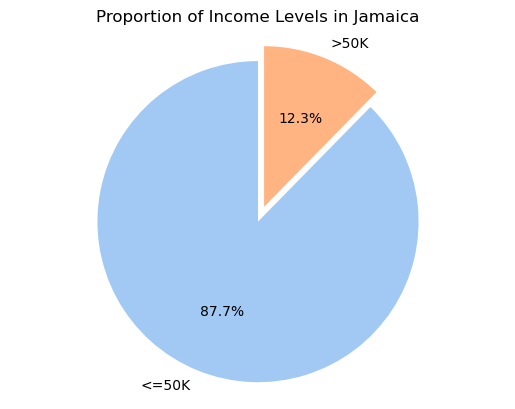

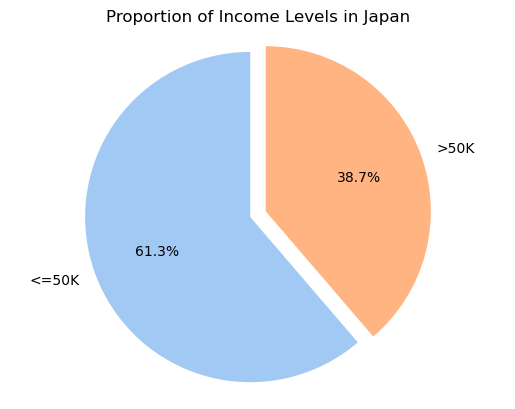

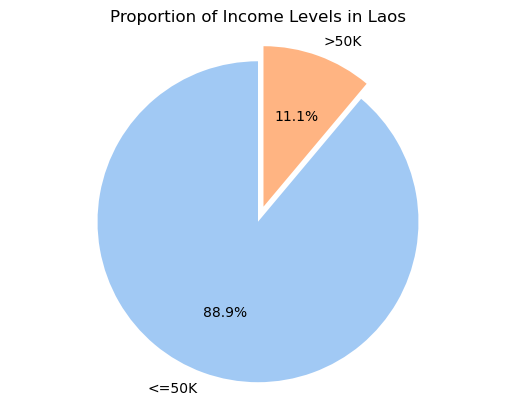

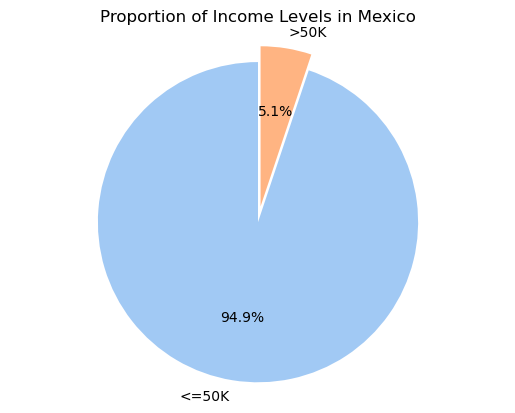

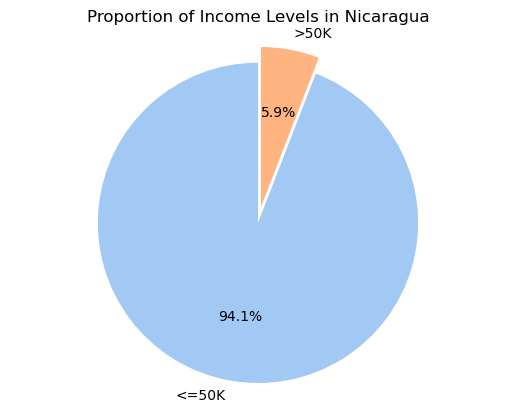

An error occurred while processing


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

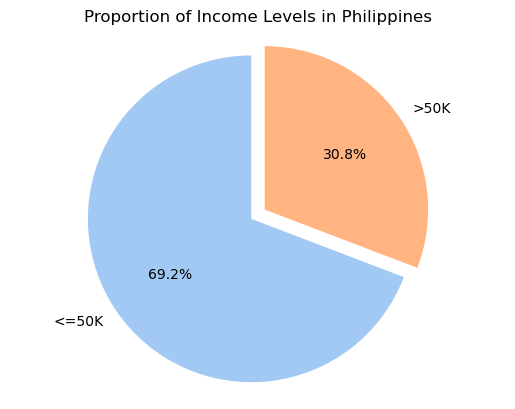

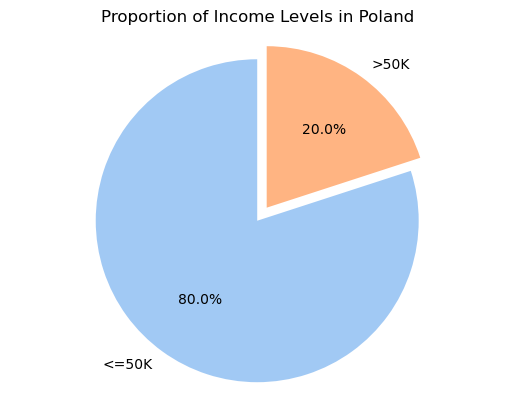

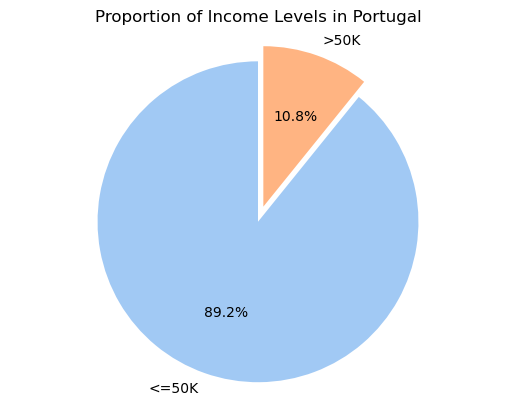

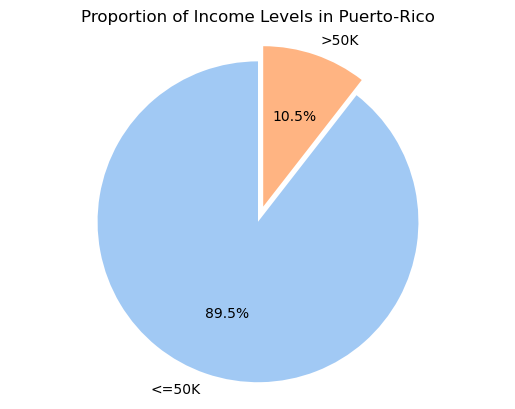

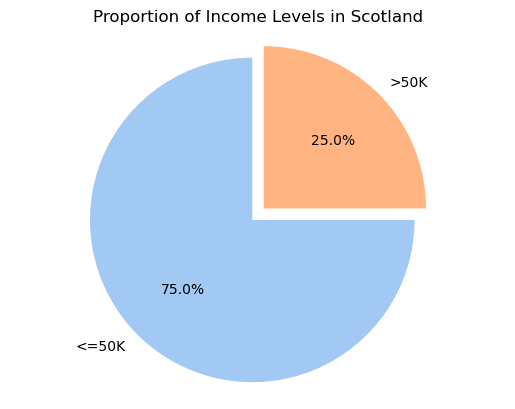

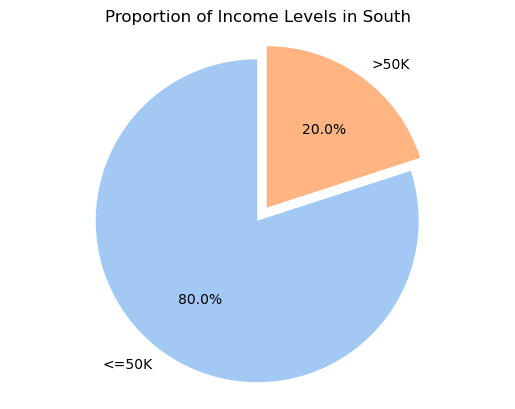

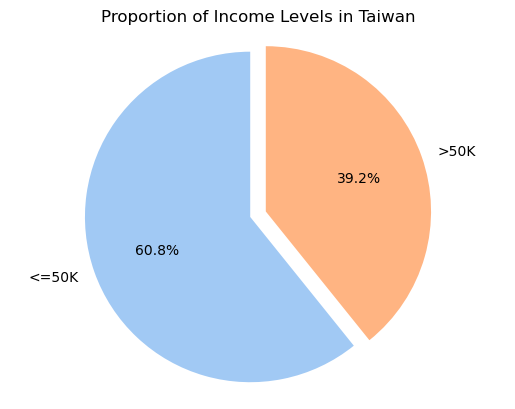

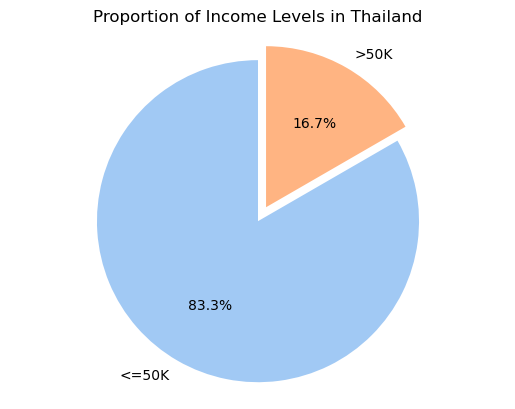

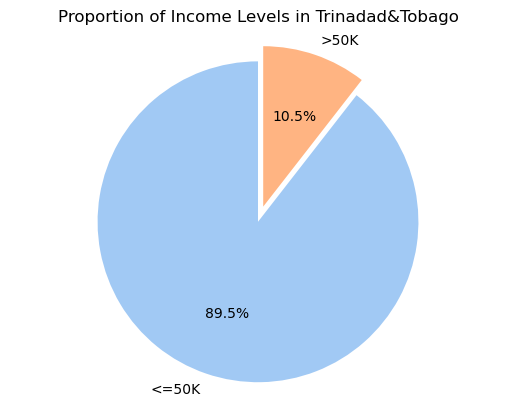

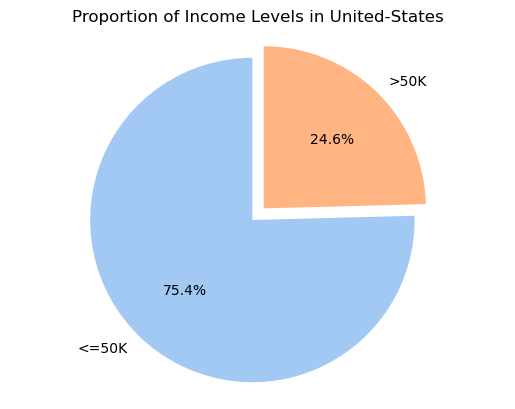

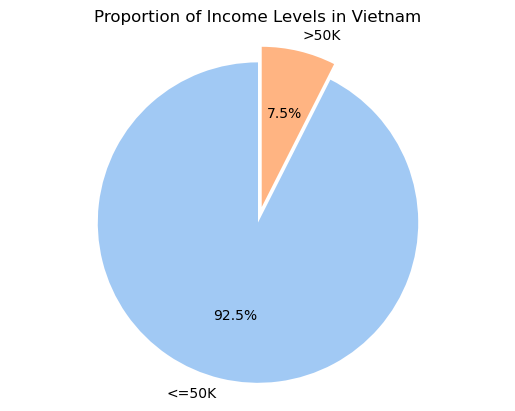

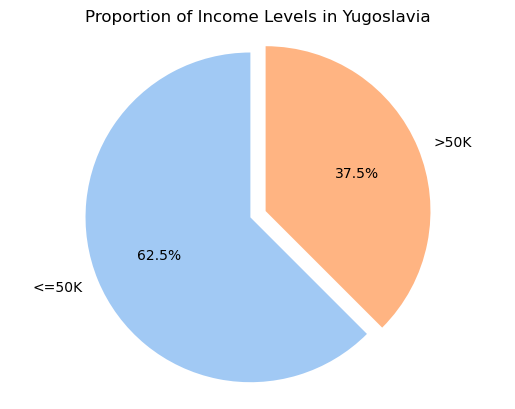

In [23]:
# Calculate the proportion of income levels by native country
income_proportion_by_country = data.groupby('native.country')['income'].value_counts(normalize=True).unstack()

# Plot the pie chart for each country
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:2]
explode = (0.1, 0)
for country in income_proportion_by_country.index:
    try:
        country_data = income_proportion_by_country.loc[country]
        plt.pie(country_data, labels=country_data.index, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
        plt.title(f'Proportion of Income Levels in {country}')
        plt.axis('equal')
        plt.show()
    except Exception as e:
        print(f"An error occurred while processing")

### Feature Engineering

<b> We would be performing these techniques in the notebook: </b>


* Missing values


* Outlier treatment


* Categorical variables: convert strings to numbers


* Standardize the values of the variables to the same range

##### Missing values

In [24]:
data = df

In [25]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

print(cat_vars)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [26]:
data[cat_vars].isna().sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

We have some set of missing values in these categorical variables. Since it is a category, we will fill the values using Mode, which is the maximum repeated value.

In [27]:
for i in range(len(cat_vars)):
    value_to_fill = list(data[cat_vars[i]].mode())[0]
    data[cat_vars[i]] = data[cat_vars[i]].fillna(value_to_fill)

In [28]:
data[cat_vars].isna().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

As we can see, it is fixed and we dont have any missing value. Let us go ahead and check the same for Numerical Values Column.

In [29]:
numerical_col = data.describe().columns.to_list()

data[numerical_col].isna().sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [30]:
for i in range(len(numerical_col)):
    value_to_fill1 = data[numerical_col[0]].mean()
    data[numerical_col[i]] = data[numerical_col[i]].fillna(value_to_fill1)

###  Modeling: KPrototype Clustering

Unlike other algorithms, Kprototype needs the index of the categorical columns. So, the code below collects only the categorical columns and gets the index corresponding to the columns.

In [31]:
# Get the position of categorical columns
catColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Categorical columns position  : [1, 3, 5, 6, 7, 8, 9, 13, 14]


In [32]:
dfMatrix = data.to_numpy()

Now, let us start building the clusters. We would build 2 clusters, we can try building more and more cluster to see which is the best. In order to know which cluster is the best, we will introduce "cost" as the evaluation parameter. The lesser the cost, the better it is. 

Usually, we would make a lot of clusters and then check their costs, the point from where the cost starts converging, is the optimal number of clusters. It is done using the elbow plot given below.

In [33]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [34]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':[1,2,3,4,5,6,7,8,9], 'Cost':cost})
df_cost.head()

,Cluster,Cost
0,1,3.645267e+14
1,2,1.511532e+14
2,3,8.173236e+13
3,4,5.397147e+13
4,5,3.997453e+13


We now have the cost for 1 and 2 clusters. The cost reduced by almost 50% when we have 2 clusters. We can keep adding more clusters and get the optimal number of clusters.

One more way is to look at how many target segments we want to make. For example, if it is a marketing campaign and we want to cluster less number of people, then make less clusters and so on. Let us now take a look at the plot below and see how the clusters=2 has a significantly less cost than clusters=1

In [35]:
from plotnine import *
import plotnine

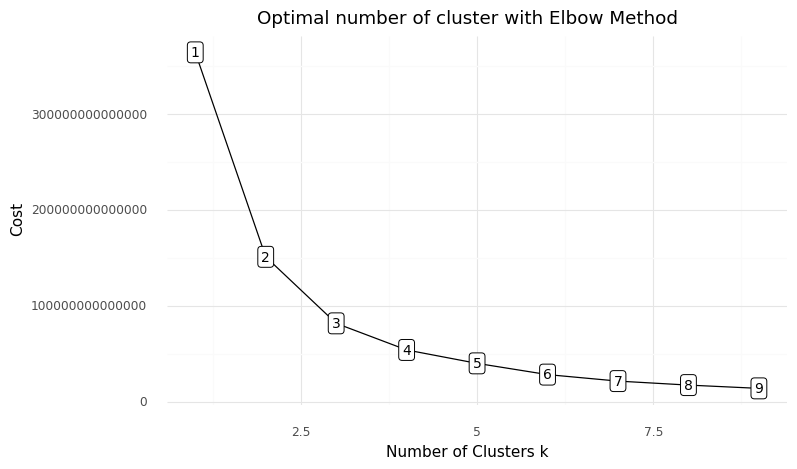

<ggplot: (8618418018920)>

In [36]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

As we discussed, the cost decreases a lot. Now, as we add more clusters, more and more datapoints with respective costs will be added. And then based on that, we can make the decisions.

Now, since we tested and selected that clusters=2 is optimal for the use case, we go ahead and then we start building clusters on it.

In [37]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -3, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

For each cluster, we have a centroid. This centroid is nothing but the center point for each of the feature. We print such points below.

In [38]:
# Cluster centorid
kprototype.cluster_centroids_

array([['39.142597638510445', '142280.57856494095', '10.143629758071175',
        '1084.6409049624308', '89.60709272562134', '40.49913301956899',
        'Private', 'HS-grad', 'Married-civ-spouse', 'Prof-specialty',
        'Husband', 'White', 'Male', 'United-States', '<=50K'],
       ['36.95227245473078', '327743.5205660151', '9.89782947595635',
        '1057.3392493104689', '80.61362273653916', '40.25830435303993',
        'Private', 'HS-grad', 'Married-civ-spouse', 'Prof-specialty',
        'Husband', 'White', 'Male', 'United-States', '<=50K']],
      dtype='<U32')

We now print the cost for clusters=2, as discussed, lesser the cost better it is.

In [39]:
kprototype.cost_

151153182435788.47

Now, in order to visualise the clusters. We will see how the unsupervised segmentation is done and how we can get insights from this. 

In [40]:
df['cluster_id'] = kprototype.labels_ 

In [41]:
df['cluster_id']

0        0
1        0
2        0
3        0
4        1
        ..
32556    1
32557    1
32558    0
32559    0
32560    0
Name: cluster_id, Length: 32561, dtype: uint16

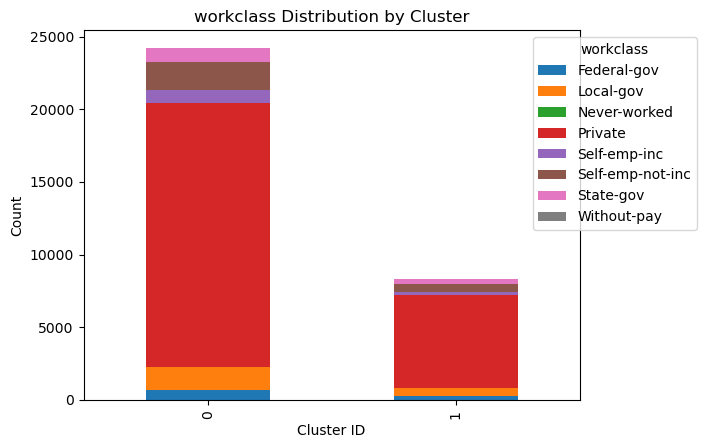

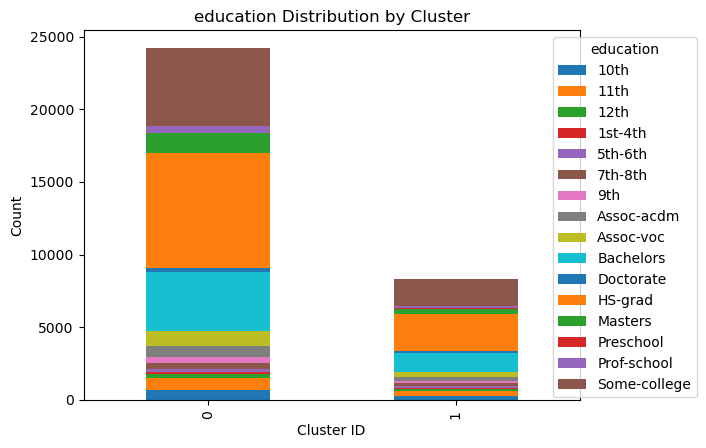

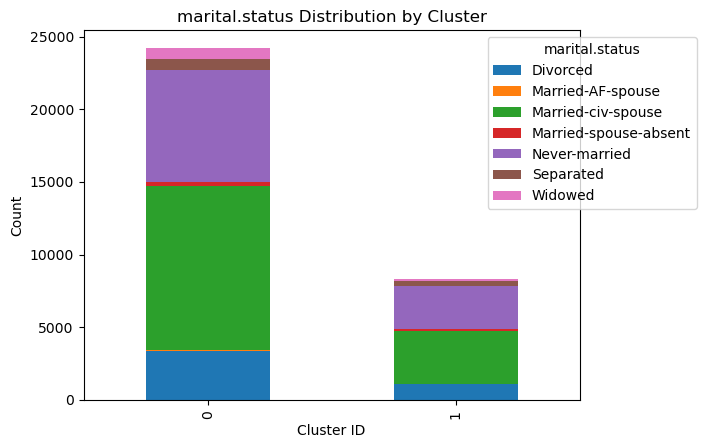

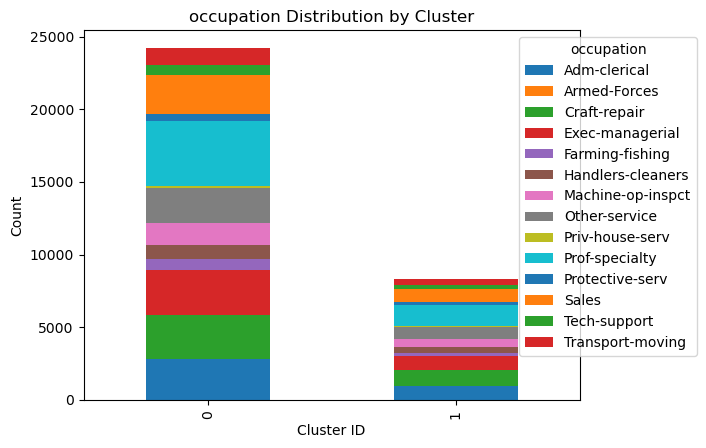

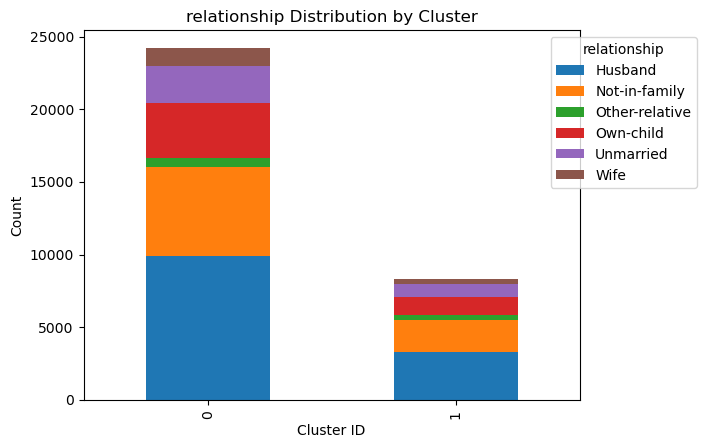

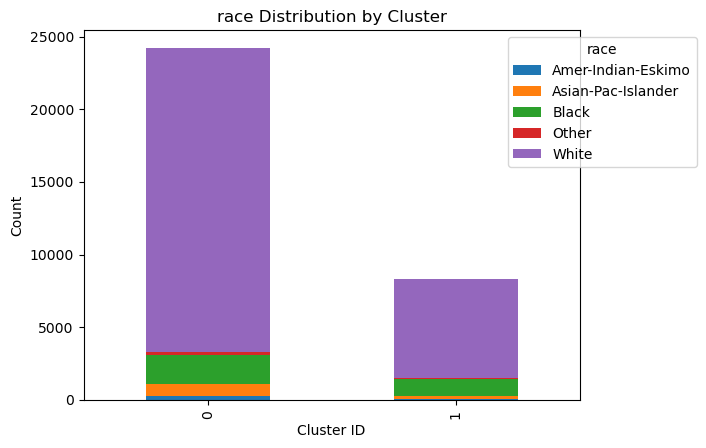

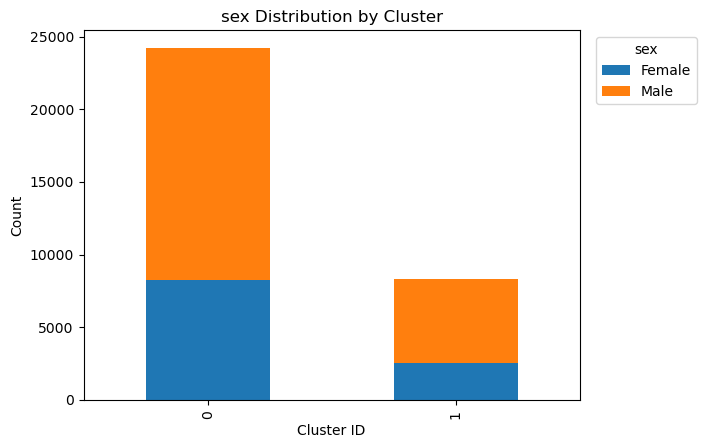

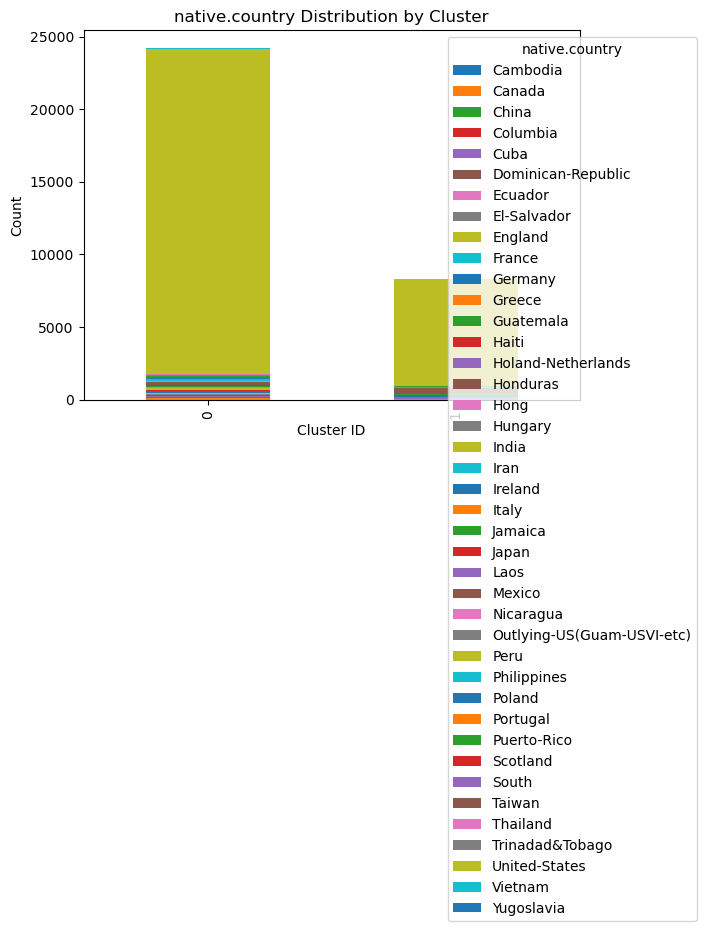

In [42]:
# Columns to analyze
columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Iterate through each column
for column in columns:
    # Count the occurrences of each category within each cluster
    cluster_category_counts = df.groupby(['cluster_id', column]).size().unstack()

    # Plot the stacked bar plot
    ax = cluster_category_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Cluster ID')
    plt.ylabel('Count')
    plt.title(f'{column} Distribution by Cluster')
    
    # Adjust the position and size of the legend
    ax.legend(title=column, loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
    
    plt.show()

We made a bar chart for the cluster for each of the feature and distribution. 

If we look at the work class distribution, we understand that in the cluster 0, majority of people have private jobs. Similarly for other features, we see a major chunk of audience is segregated in a single cluster. 

Depending on our use case, to target the majority audience or niche audience, we can go ahead and work with the numbers.

#### Conclusion

The conclusion that can be drawn from this project is:

* In this study, we performed K-prototype clustering on a given dataset with the goal of identifying patterns and grouping similar data points together. By applying the K-prototype algorithm, we aimed to gain insights into the underlying structure of the data and potentially discover meaningful clusters or segments.

* After preprocessing the data and handling missing values or anomalies, we determined the optimal number of clusters. In this case, we selected 2 clusters based on the costs that we obtained.

* Finally, we looked into some bar charts and understoof how the segmentation takes place. And then how can we work with the segmentation.